# Introduction to Scikit Learn

In [10]:
# get data ready
import pandas as pd
import numpy as np
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#features matrix
X=heart_disease.drop('target',axis=1)

y=heart_disease['target']

In [ ]:
import warnings
warnings.filterwarnings('ignore') # if you want to ignore all warnings

In [24]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
executable: /Users/balaji/anaconda3/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.24.3
        scipy: 1.11.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/balaji/anaconda3/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 10
threading_layer: pthreads
   architecture: Nehalem

       filepath: /Users/balaji/anaconda3/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 10


In [6]:
# choose model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

#keep defualt hyper params
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# fit model to data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
clf.fit(X_train,y_train);

In [11]:
#make a prediction
y_label=clf.predict(np.array([0,2,3,4]))

/Users/balaji/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [14]:
# evaluate
clf.score(X_train,y_train)

1.0

In [15]:
clf.score(X_test,y_test)

0.8360655737704918

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.89      0.84      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [18]:
confusion_matrix(y_test,y_pred)

array([[20,  4],
       [ 6, 31]])

In [19]:
accuracy_score(y_test,y_pred)

0.8360655737704918

In [21]:
# improve model

#try different amoount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    print(f"Model acurracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print(" ")
                               

Trying model with 10 estimators
Model acurracy on test set: 78.69%
 
Trying model with 20 estimators
Model acurracy on test set: 86.89%
 
Trying model with 30 estimators
Model acurracy on test set: 78.69%
 
Trying model with 40 estimators
Model acurracy on test set: 86.89%
 
Trying model with 50 estimators
Model acurracy on test set: 85.25%
 
Trying model with 60 estimators
Model acurracy on test set: 83.61%
 
Trying model with 70 estimators
Model acurracy on test set: 85.25%
 
Trying model with 80 estimators
Model acurracy on test set: 81.97%
 
Trying model with 90 estimators
Model acurracy on test set: 83.61%
 


In [22]:
# save a model
import pickle

pickle.dump(clf,open('random_forest_model_1.pkl','wb'))

In [23]:
loaded_model=pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test,y_test)

0.8360655737704918

In [26]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Getting data Ready

1. split the data into features and labels (X and y)
2. Filling (imputing) missing values
3. non numeric values to numeric values (feature encoding)


In [27]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
X=heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Split data into training and test sets

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Make sure its all numerical

In [35]:
car_sales=pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [36]:
len(car_sales)

1000

In [37]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [44]:
car_sales['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

### Split into train and test data

In [40]:
X=car_sales.drop("Price", axis=1)
y=car_sales["Price"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [41]:
# Building machine learning model

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [46]:
#turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot", 
                               one_hot,
                               categorical_features)],
                              remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [47]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [49]:
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [50]:
# lets refit model

np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

In [51]:
model.fit(X_train,
          y_train)

RandomForestRegressor()

In [52]:
model.score(X_test,y_test)

0.3235867221569877

### Missing values

1. fill them with values (imputing)
2. remove the samples with missing data

In [57]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [58]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [59]:
# create X and y 
X=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [60]:
# lets try and convert data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot", 
                               one_hot,
                               categorical_features)],
                              remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### fill missing data with pandas

In [61]:
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),
                                          inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)


In [62]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [64]:
# remove rows with missing price values
car_sales_missing.dropna(inplace=True)

In [65]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [66]:
X=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot", 
                               one_hot,
                               categorical_features)],
                              remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [68]:
# fill with scikit learn
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [69]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [71]:
# drop rows with missing price values
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [72]:
# Split into  X and y
X=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]


In [73]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [75]:
# fill missing values from scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with missing and numerical with mean
cat_imputer=SimpleImputer(strategy="constant", fill_value='missing')
door_imputer=SimpleImputer(strategy='constant', fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

cat_features=["Make","Colour"]
door_feature=["Doors"]
num_features=["Odometer (KM)"]

# create an imputer
imputer=ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

#transform data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [76]:
car_sales_filled=pd.DataFrame(filled_X, 
                              columns=["Make","Colour",'Doors','Odometer (KM)'])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot", 
                               one_hot,
                               categorical_features)],
                              remainder="passthrough")

transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [78]:
# now we've got our data as numbers and fillled

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(transformed_X, y,
                                                 test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.3323094506053308

## choosing the right estimator/algo

* classification problem
* regression problem - predicting number


## Regression problem

In [80]:
# get california housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [84]:
housing_df=pd.DataFrame(housing["data"],
                       columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [87]:
housing_df["target"]=housing["target"]

In [88]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [91]:
housing_df=housing_df.drop("MedHouseVal", axis=1)

In [92]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [94]:
#import model
from sklearn.linear_model import Ridge


np.random.seed(42)
x=housing_df.drop('target',axis=1)
y=housing_df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5758549611440122

In [96]:
# try a different model

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target", axis=1)
y=housing_df['target']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8066196804802649

### Choosing estimator for classification problem

In [97]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
# Linear SVC

from sklearn.svm import LinearSVC
np.random.seed(42)

X=heart_disease.drop('target', axis=1)
y=heart_disease['target']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=LinearSVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

/Users/balaji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/balaji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [105]:

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart_disease.drop('target', axis=1)
y=heart_disease['target']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

### %timeit to choose better if % is close

### Make predictions

In [120]:

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart_disease.drop('target', axis=1)
y=heart_disease['target']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

## fitting the model to data

clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

In [115]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [124]:
# use a trained model to make predictions


In [121]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [122]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [125]:
# compare predictions to truth labels to evaluate model
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

### Make predictions with `predict_proba()`
 
 * returns probability


In [128]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [129]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

`predict()` on regression models

In [130]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [131]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create data
X=housing_df.drop("target", axis=1)
y=housing_df['target']

#split data

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8066196804802649

In [134]:
y_pred=model.predict(x_test)
y_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [136]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [139]:
# compare rpeds to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.3265721842781009

In [140]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## Evaluating a model

1. Estimators built in score method
2. `scoring` paramter
3. metric functions

In [143]:
# score method

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart_disease.drop('target', axis=1)
y=heart_disease['target']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

In [146]:
# scoring parameter
from sklearn.model_selection import cross_val_score

cross_val_score(clf,X,y, cv=5)

# try with different sets of test data and train data,
# different versions or different 20%


array([0.83606557, 0.90163934, 0.81967213, 0.8       , 0.78333333])

In [147]:
np.random.seed(42)
clf_single_score=clf.score(x_test,y_test)

clf_crossval_score=np.mean(cross_val_score(clf,X,y,cv=5))

clf_single_score, clf_crossval_score

(0.8524590163934426, 0.8248087431693989)

#### Scoring parameter set to none by defautl
#### if None then mean accuracy

## evaulation metrics
1. accuracy
2. area under roc
3. confusion matrix
4. clasification report

**Accuracy**

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart_disease.drop('target', axis=1)
y=heart_disease['target']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
cross_val=cross_val_score(clf,X,y)

In [156]:
np.mean(cross_val)

0.811639344262295

In [157]:
print(f"Cross vaildated heart disease classfier accuracy: {np.mean(cross_val)*100:.2f}%")

Cross vaildated heart disease classfier accuracy: 81.16%


**Area under roc curve**
* receiver operating characteristic
* comparison of model's true positive rate versus flase positive rate

In [160]:
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(x_test)
y_probs[:10]
                          

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [161]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [163]:
# calculate fpr, tpr, thresholds
fpr,tpr,threshold=roc_curve(y_test, y_probs_positive)

# check fpr
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

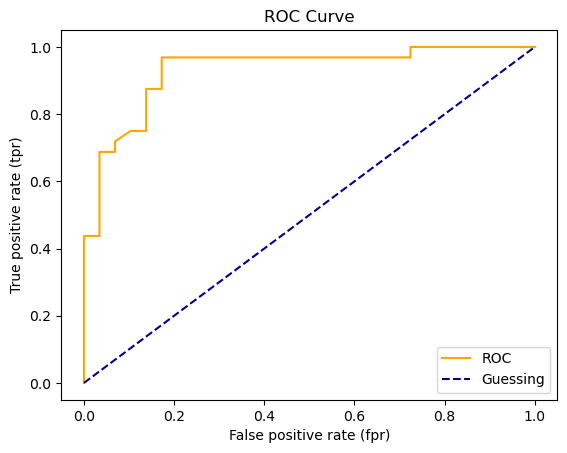

In [165]:
#create functon for plotting roc curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange", label="ROC")
    
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [166]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724